In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

### Define objective function and it's gradient

In [2]:
def cal_obj(param):
    return 3*param[0]**3 - 4*param[1]**2 + 3*param[0]*param[1]
    
def cal_obj_grad(param):
    return np.array([9*param[0]**2+3*param[1], -8*param[1]+3*param[0]])

### Back-tracking line search with armijo condition

In [14]:
def back_tracking_lin_search(cal_obj, cal_obj_grad, param, beta, alpha, max_iter=10):
    
    grad = cal_obj_grad(param)
    obj = cal_obj(param)
    
    for i in range(max_iter):
        tmp_beta = beta/2**i
        tmp_param = param - tmp_beta*grad
        tmp_obj = cal_obj(tmp_param)
        
        armijo_cond = alpha*tmp_beta*np.linalg.norm(grad)**2
        
        print(tmp_beta, tmp_param, obj, tmp_obj, armijo_cond)
        
        if abs(obj - tmp_obj) >= armijo_cond:
            return tmp_param
        
    return tmp_param
            

### An example. The classical two variable function I have defined here is not bounded from below. That's why specifically for this example, if we keep running the line search than it'll reach negative infinity shortly. I think it'll behave well for a bounded objective function.

In [15]:
x = np.arange(-20.0,20.0,0.1)
y = np.arange(-20.0,20.0,0.1)
X,Y = np.meshgrid(x, y) # grid of point
Z = cal_obj([X, Y]) # evaluation of the function on the grid

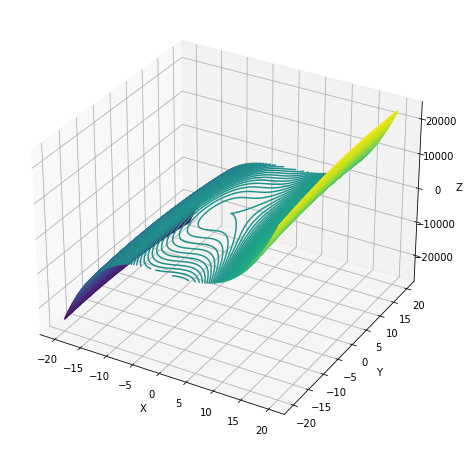

In [16]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 500, cmap='viridis')
# ax.plot(x, y, z_func, 'r.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [17]:
### Choose initial value of the parameters, beta and alpha

In [18]:
np.random.seed(11)
init_param = np.random.rand(2)
print(init_param)

[0.18026969 0.01947524]


In [19]:
param_list = []
for i in range(10):
    init_param = back_tracking_lin_search(cal_obj, cal_obj_grad, init_param, 0.1, .5)
    param_list.append(init_param)
param_list

0.1 [ 0.14517967 -0.01902547] 0.026590006208614132 -0.0005542941345932396 0.013568071190450904
0.1 [ 0.13191789 -0.07779975] -0.0005542941345932396 -0.04811370626675293 0.018151453712345802
0.1 [ 0.13959572 -0.17961492] -0.04811370626675293 -0.19610560704546237 0.052126387312668665
0.1 [ 0.17594193 -0.36518557] -0.19610560704546237 -0.7098572157308585 0.17878756613028965
0.1 [ 0.25763759 -0.7101166 ] -0.7098572157308585 -2.5146168256114896 0.6282579987828426
0.1 [ 0.41093316 -1.35550116] -2.5146168256114896 -8.81241674697661 2.2001038045417762
0.1 [ 0.66560405 -2.56318204] -8.81241674697661 -30.51315657325706 7.616751840574745
0.1 [ 1.03583279 -4.81340889] -30.51315657325706 -104.29909182110222 26.00295093566307
0.1 [ 1.51420085 -8.97488584] -104.29909182110222 -352.54834431090364 87.7336319743997
0.1 [  2.14314281 -16.60905476] -352.54834431090364 -1180.6987719852607 293.38051589885737


[array([ 0.14517967, -0.01902547]),
 array([ 0.13191789, -0.07779975]),
 array([ 0.13959572, -0.17961492]),
 array([ 0.17594193, -0.36518557]),
 array([ 0.25763759, -0.7101166 ]),
 array([ 0.41093316, -1.35550116]),
 array([ 0.66560405, -2.56318204]),
 array([ 1.03583279, -4.81340889]),
 array([ 1.51420085, -8.97488584]),
 array([  2.14314281, -16.60905476])]

In [22]:
z = cal_obj(np.array(list(zip(*param_list))))
z

array([-5.54294135e-04, -4.81137063e-02, -1.96105607e-01, -7.09857216e-01,
       -2.51461683e+00, -8.81241675e+00, -3.05131566e+01, -1.04299092e+02,
       -3.52548344e+02, -1.18069877e+03])

In [21]:
x, y = np.array(list(zip(*param_list)))
x, y

(array([0.14517967, 0.13191789, 0.13959572, 0.17594193, 0.25763759,
        0.41093316, 0.66560405, 1.03583279, 1.51420085, 2.14314281]),
 array([ -0.01902547,  -0.07779975,  -0.17961492,  -0.36518557,
         -0.7101166 ,  -1.35550116,  -2.56318204,  -4.81340889,
         -8.97488584, -16.60905476]))

### The red dots are showing the propagation of the parameters and the adaptive method is choosing the biggest possible step in each iteration of the line search algorithm.

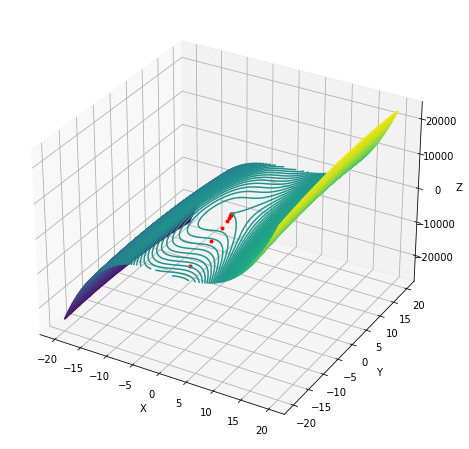

In [23]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 500, cmap='viridis')
ax.plot(x, y, z, 'r.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()